In [1]:
import pandas as pd 
data_whole = pd.read_csv("VOTER_Survey_December16_Release1.csv", low_memory=False) 
data=data_whole[[
 'presvote16post_2016',
 'fav_trump_2016',
 'fav_hrc_2016',
 'fav_sanders_2016',
 'trust_people_2016',
 'CIVIC_PARTICIPATION_2016',
 'POLITICAL_CORRECTNESS_2016',
 'race_2016',
 'smokenow_2016',
 'educ_2016',
 'marstat_2016',
 'ideo5_2016',
 'newsint_2016',
    
 'pew_religimp_2016',
 'pew_churatd_2016',
 'pew_prayer_2016',
 'religpew_2016',
    
 'urbancity_baseline',
    
 'smoke100_baseline',
 'gender_baseline',
 'faminc_baseline',]]

#filtering data
list_of_candidates=['Hillary Clinton','Donald Trump','Did not vote for President']
data=data[data['presvote16post_2016'].isin(list_of_candidates)]

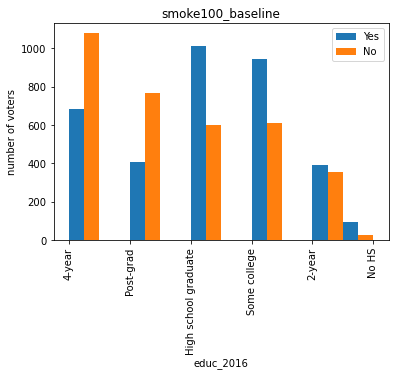

In [2]:
    import matplotlib.pyplot as plt
    def hist_plot_by_two_values(variable1,variable2):
        data_copy=data[[variable1,variable2]]
        data_copy_clean=data_copy.dropna(axis=0, how='any')
    
    
        list_of_values=[]
        for x in data_copy_clean[variable2].unique():
            list_of_values.append(x)
       
        list_of_numpy_arrays=[]
        for x in list_of_values:
            list_of_numpy_arrays.append(data_copy_clean[variable1][data_copy_clean[variable2]==x])
        
        plt.hist(list_of_numpy_arrays,rwidth=1)
        
        plt.legend(data_copy_clean[variable2].unique())
        
        plt.title(variable2)
        plt.xlabel(variable1)
        plt.ylabel('number of voters')
        
        if(len(data_copy_clean[variable1].unique())>3):
            plt.xticks(rotation=90)
        elif(len(data_copy_clean[variable1].unique())>5):
            plt.xticks(rotation=45)
        elif(len(data_copy_clean[variable1].unique())>8):
            plt.xticks(rotation=90)
        
#         plt.show
        
        
hist_plot_by_two_values('educ_2016','smoke100_baseline')

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

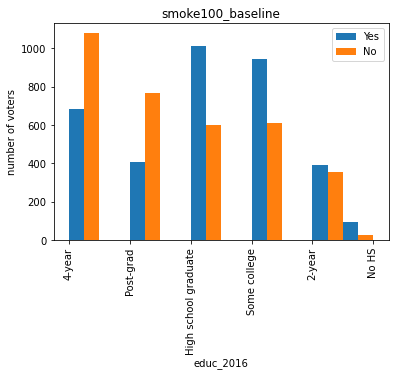

In [3]:
def hist_plot_by_two_values_return(variable1,variable2):
    data_copy=data[[variable1,variable2]]
    data_copy_clean=data_copy.dropna(axis=0, how='any')


    list_of_values=[]
    for x in data_copy_clean[variable2].unique():
        list_of_values.append(x)

    list_of_numpy_arrays=[]
    for x in list_of_values:
        list_of_numpy_arrays.append(data_copy_clean[variable1][data_copy_clean[variable2]==x])

    plt.hist(list_of_numpy_arrays,rwidth=1)

    plt.legend(data_copy_clean[variable2].unique())

    plt.title(variable2)
    plt.xlabel(variable1)
    plt.ylabel('number of voters')

    if(len(data_copy_clean[variable1].unique())>3):
        plt.xticks(rotation=90)
    elif(len(data_copy_clean[variable1].unique())>5):
        plt.xticks(rotation=45)
    elif(len(data_copy_clean[variable1].unique())>8):
        plt.xticks(rotation=90)
        
    return plt

hist_plot_by_two_values_return('educ_2016','smoke100_baseline')

In [4]:
data["educ_2016"].unique()

array(['4-year', 'Some college', 'High school graduate', '2-year',
       'Post-grad', 'No HS'], dtype=object)

In [5]:
# PLOTTING ALL COMBINATIONS OF PLOTS TO FILE
# o=0
# plt.tight_layout()
# for i in range(len(data.columns)):
#     for x in range(i+1,len(data.columns)):
#         o+=1
#         plt.figure(figsize=(20, 10))
#         hist_plot_by_two_values(data.columns[i],data.columns[x])
# #         plt.autoscale()
#         plt.tight_layout()

#         plt.savefig(f'plots/{data.columns[i]}  WITH  {data.columns[x]}.png')
#         plt.clf()
# #     print(x)

In [6]:
# !pip install researchpy
import pandas as pd
import researchpy as rp
import scipy.stats as stats
data






#significant
# chosen_variable1="newsint_2016"
# chosen_variable2="marstat_2016"


#significant:
# chosen_variable2="gender_baseline"
# chosen_variable1="newsint_2016"




#RELIGION:

#significant:
# chosen_variable1="newsint_2016"
# chosen_variable2="religpew_2016"

#significant:
# chosen_variable1='smokenow_2016'
# chosen_variable2='pew_churatd_2016'

# NOT significant:
# chosen_variable1='smokenow_2016'
# chosen_variable2='pew_prayer_2016'

# NOT significant:
# chosen_variable1='smokenow_2016'
# chosen_variable2='pew_religimp_2016'


#EDUCATION:

#not significant:
# chosen_variable2="educ_2016"
# chosen_variable1="smokenow_2016"

#significant:
chosen_variable1="smoke100_baseline"
chosen_variable2="educ_2016"

#significant
# chosen_variable1="newsint_2016"
# chosen_variable2="educ_2016"



#half significant (only for post_grad value)
# chosen_variable1="smokenow_2016"
# chosen_variable2="educ_2016"


#TRUST TO OTHER PEOPLE:

#significant:
# chosen_variable1="presvote16post_2016"
# chosen_variable2="trust_people_2016"

# NOT significant:
# chosen_variable1="trust_people_2016"
# chosen_variable2="urbancity_baseline"



crosstab, test_results, expected = rp.crosstab(data[chosen_variable1], data[chosen_variable2],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


crosstab = pd.crosstab( data[chosen_variable1],data[chosen_variable2])
crosstab

normalized=crosstab.div(crosstab.sum(axis=0), axis=1)
crosstab


educ_2016,2-year,4-year,High school graduate,No HS,Post-grad,Some college
smoke100_baseline,,,,,,
No,357,1081,598,27,766,610
Yes,393,683,1011,94,409,943


In [7]:
crosstab

educ_2016,2-year,4-year,High school graduate,No HS,Post-grad,Some college
smoke100_baseline,,,,,,
No,357,1081,598,27,766,610
Yes,393,683,1011,94,409,943


In [8]:
test_results

#The p-value of 0.000 signifies that the difference between the two proportions is statistically significant.


,Chi-square test,results
0,Pearson Chi-square ( 5.0) =,413.3128
1,p-value =,0.0000
2,Cramer's V =,0.2435


In [9]:
type(rp.summary_cat(data[[chosen_variable1, chosen_variable2]]))

pandas.core.frame.DataFrame

In [10]:
help(rp.crosstab)

Help on function crosstab in module researchpy.crosstab:

crosstab(group1, group2, prop=None, test=False, margins=True, correction=None, cramer_correction=None, exact=False, expected_freqs=False)



In [11]:
data.columns

Index(['presvote16post_2016', 'fav_trump_2016', 'fav_hrc_2016',
       'fav_sanders_2016', 'trust_people_2016', 'CIVIC_PARTICIPATION_2016',
       'POLITICAL_CORRECTNESS_2016', 'race_2016', 'smokenow_2016', 'educ_2016',
       'marstat_2016', 'ideo5_2016', 'newsint_2016', 'pew_religimp_2016',
       'pew_churatd_2016', 'pew_prayer_2016', 'religpew_2016',
       'urbancity_baseline', 'smoke100_baseline', 'gender_baseline',
       'faminc_baseline'],
      dtype='object')

In [12]:
#DASHBOARD


# !pip install plotly
# !pip install dash
import pandas as pd
import plotly.express as px  # (version 4.7.0)
import plotly.graph_objects as go

import dash  # (version 1.12.0) pip install dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app2 = dash.Dash(__name__)


# App layout
app2.layout = html.Div([

    html.H1("Dashboard - Voters Analysis", style={'text-align': 'center'}),

    dcc.Dropdown(id="variable1",
                 options=[
                     {"label": "Interest in news", "value": 'newsint_2016'},
                     {"label": "Vote for president", "value": 'presvote16post_2016'},
                     {"label": "Trump Favorability", "value": 'fav_trump_2016'},
                     {"label": "Clinton Favorability", "value":'fav_hrc_2016'},
                     {"label": "Sanders Favorability", "value":'fav_sanders_2016'},
                     {"label": "Trust toward other people", "value": 'trust_people_2016'},
                     {"label": "Civic Participation", "value":'CIVIC_PARTICIPATION_2016'},
                     {"label": "Political Correctness", "value": 'POLITICAL_CORRECTNESS_2016'},
                     {"label": "Race", "value": 'race_2016'},
                     {"label": "Smoking Cigarettes", "value": 'smokenow_2016' },
                     {"label": "Education", "value":'educ_2016'},
                     {"label": "Marital Status", "value":  'marstat_2016'},
                     {"label": "ideology", "value":'ideo5_2016' },
                     {"label": "Religion Importance", "value": 'pew_religimp_2016' },
                     {"label": "Church Attendance", "value":'pew_churatd_2016'},
                     {"label": "Praying Frequency", "value":'pew_prayer_2016'},
                     {"label": "Religion", "value":'religpew_2016'},
                     {"label": "Urbanicity", "value": 'urbancity_baseline'},
                     {"label": "Smoked 100 cigarettes ever", "value":'smoke100_baseline'},
                     {"label": "Gender", "value":'gender_baseline' },
                     {"label": "Family Income", "value":'faminc_baseline' }],
                 multi=False,
                 value='newsint_2016',
                 style={'width': "40%"}
                 ),
    
    dcc.Dropdown(id="variable2",
                 options=[
                     {"label": "Interest in news", "value": 'newsint_2016'},
                     {"label": "Vote for president", "value": 'presvote16post_2016'},
                     {"label": "Trump Favorability", "value": 'fav_trump_2016'},
                     {"label": "Clinton Favorability", "value":'fav_hrc_2016'},
                     {"label": "Sanders Favorability", "value": 'fav_sanders_2016'},
                     {"label": "Trust toward other people", "value": 'trust_people_2016'},
                     {"label": "Civic Participation", "value":'CIVIC_PARTICIPATION_2016'},
                     {"label": "Political Correctness", "value": 'POLITICAL_CORRECTNESS_2016'},
                     {"label": "Race", "value": 'race_2016'},
                     {"label": "Smoking Cigarettes", "value": 'smokenow_2016' },
                     {"label": "Education", "value":'educ_2016'},
                     {"label": "Marital Status", "value":  'marstat_2016'},
                     {"label": "ideology", "value":'ideo5_2016' },
                     {"label": "Religion Importance", "value": 'pew_religimp_2016' },
                     {"label": "Church Attendance", "value":'pew_churatd_2016'},
                     {"label": "Praying Frequency", "value":'pew_prayer_2016'},
                     {"label": "Religion", "value":'religpew_2016'},
                     {"label": "Urbanicity", "value": 'urbancity_baseline'},
                     {"label": "Smoked 100 cigarettes ever", "value":'smoke100_baseline'},
                     {"label": "Gender", "value":'gender_baseline' },
                     {"label": "Family Income", "value":'faminc_baseline' }],
                 multi=False,
                 value='gender_baseline',
                 style={'width': "40%"}
                 ),
    
    dcc.Dropdown(id="type_of_graph",
                 options=[
                     {"label": "histogram for first variable", "value": 'histogram1'},
                     {"label": "histogram for second variable", "value": 'histogram2'},
                     {"label": "parallel plot", "value": 'parallel'},
                     {"label": "2D Hist - heat map", "value": "heatmap"},
                     {"label": "cross table", "value": 'table'},
                     {"label": "sun plot", "value": 'sun'}],
                 multi=False,
                 value='histogram1',
                 style={'width': "40%"}
                 ),
 
    html.Div(id='output_container', children=[]),
    html.Br(),

    dcc.Graph(id='my_bee_map', figure={})
    

])
    
# hist_plot_by_two_values('educ_2016','smoke100_baseline')

In [ ]:
from plotly.tools import mpl_to_plotly
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
pd.options.plotting.backend = "plotly"
import numpy as np      
# Read Images 



# Connect the Plotly graphs with Dash Components
@app2.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='my_bee_map', component_property='figure')],
    [Input(component_id='variable1', component_property='value'),
    Input(component_id='variable2', component_property='value'),
    Input(component_id='type_of_graph', component_property='value')]
)
def update_graph(option_slctd1,option_slctd2,option_slctd3):
    
    
    print(option_slctd1)
    print(type(option_slctd1))
    print(option_slctd2)
    print(type(option_slctd2))
    print(option_slctd3)
    print(type(option_slctd3))
    
    container = "Variables chosen by user are: {} and {}, type of data presentation:  {} ".format(option_slctd1,option_slctd2,option_slctd3)
    
    df=data.copy()
    
    # Plotly Express
    
    if(option_slctd3=='histogram1'):
        fig = px.histogram(df, x=option_slctd1)
        
    elif(option_slctd3=='histogram2'):
        fig = px.histogram(df, x=option_slctd2)
    
    elif(option_slctd3=="heatmap"):
        fig = px.density_heatmap(df, x=option_slctd1, y=option_slctd2)
        
    elif(option_slctd3=='parallel'):
        df2=df[[option_slctd1,option_slctd2]]
        fig = px.parallel_categories(df2)
        
    elif(option_slctd3=='table'):
        
        crosstab = pd.crosstab( df[option_slctd1],df[option_slctd2])
        fig = crosstab.plot.bar()
        
    elif(option_slctd3=='sun'):
        
        variable1=option_slctd1
        variable2=option_slctd2

        df=data.copy()

        df=df[[variable1,variable2]]
        df['value']=1.0
        df=df.dropna()
        fig = px.sunburst(df, path=[variable1, variable2],  
                          values='value', color=variable2) 
        
    
    return container, fig


# ------------------------------------------------------------------------------
if __name__ == '__main__':
    app2.run_server(debug=False)



Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Jan/2022 01:42:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2022 01:42:22] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2022 01:42:22] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2022 01:42:22] "GET /_favicon.ico?v=1.17.0 HTTP/1.1" 200 -


newsint_2016
<class 'str'>
gender_baseline
<class 'str'>
histogram1
<class 'str'>


127.0.0.1 - - [08/Jan/2022 01:42:37] "POST /_dash-update-component HTTP/1.1" 200 -


newsint_2016
<class 'str'>
religpew_2016
<class 'str'>
histogram1
<class 'str'>


127.0.0.1 - - [08/Jan/2022 01:42:41] "POST /_dash-update-component HTTP/1.1" 200 -


newsint_2016
<class 'str'>
religpew_2016
<class 'str'>
parallel
<class 'str'>


127.0.0.1 - - [08/Jan/2022 01:42:45] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [08/Jan/2022 01:42:47] "POST /_dash-update-component HTTP/1.1" 200 -


newsint_2016
<class 'str'>
religpew_2016
<class 'str'>
histogram1
<class 'str'>
newsint_2016
<class 'str'>
pew_prayer_2016
<class 'str'>
histogram1
<class 'str'>


127.0.0.1 - - [08/Jan/2022 01:42:49] "POST /_dash-update-component HTTP/1.1" 200 -


newsint_2016
<class 'str'>
pew_prayer_2016
<class 'str'>
sun
<class 'str'>


127.0.0.1 - - [08/Jan/2022 01:42:52] "POST /_dash-update-component HTTP/1.1" 200 -


newsint_2016
<class 'str'>
pew_prayer_2016
<class 'str'>
heatmap
<class 'str'>


127.0.0.1 - - [08/Jan/2022 01:43:48] "POST /_dash-update-component HTTP/1.1" 200 -
